In [5]:
# Compress the folder into a .tar.gz file
!tar chzvf data.tar.gz shared_data_read_only/

shared_data_read_only/
shared_data_read_only/Data/
shared_data_read_only/Data/AfriKids/
shared_data_read_only/Data/AfriKids/ExternalReports/
shared_data_read_only/Data/AfriKids/ExternalReports/GES_EMIS/
shared_data_read_only/Data/AfriKids/ExternalReports/GES_EMIS/Census Data.xlsx
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/VOL_3E_ Economic Activity_district.xlsx
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3D_Literacy and Education_district.xlsx
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3F_Difficulty in Performing Activities_district.xlsx
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3C_Background Characteristics_ district.xlsx
shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Archive/
shared_data_read_only/Data/AfriKids/ExternalReports

In [3]:
import pandas as pd

# Correct file path with proper string closure
file_path = 'Data_Cleaned_Community.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.describe()
df.head()


,1.Name of District,2.Name of Community,4. Sex,5. Age(in years),6. Educational Level,Grades,Challenges,Stem Club,a. Can you share any experiences or situations where you felt unsafe or uncomfortable in your community? (Qualitative),Safeness_of_community(1-10),...,b. Can you name any of these committees?,c. What do they do to protect children? (Qualitative),"d. On a scale of 1 to 10, how would you rate the activeness of these committees are in working with government agencies? (Qualitative)",Indicator: Proportion of Traditional Authorities and opinion leaders publicly promoting child rights and ending harmful traditional practices,"a. In your community, do traditional leaders and important people in your community or district talk about the rights of children and stopping harmful practices? (Qualitative)",b. How often do you hear traditional leaders or opinion leaders speaking out about child rights and ending harmful practices? (Qualitative),c. Do you think these leaders' support is making a difference in your community? (Qualitative),"d. If yes, what difference?",Comments/Remarks,b. How often do you hear traditional leaders or opinion leaders speaking out about child rights and ending harmful practices? (Qualitative).1
0,Binduri,Aniise,male,11,Upper primary,He got 75 out of 💯. He is doing well,The workload in the house is too much for me,No,I am safe,5,...,They is no committee in the community,I have never seen it before,5,No please. They is none like this here.,No,5. Never,No,They don't do that here,Better,5. Never
1,Binduri,Aniise,female,13,Upper primary,I got 72. It's good,No light at home and inadequate reading materials,No,They kill people in Avomdaago,4,...,No,I don't know,0,Many people normally come when they are talkin...,No,3. Sometimes,Yes,They listen to them,Good,3. Sometimes
2,Binduri,Aniise,male,14,Upper primary,I got 85 out of 💯. He is doing well,So much work for me in the house,No,We are safe,3,...,No please . I don't know them,I don't know about them,3,No please. They don't do,No,5. Never,No,I don't know about it,Better,5. Never
3,Binduri,Aniise,female,12,Upper primary,75 is my average which is better than last year,Light to read at night,No,They kill people yesterday in our community,4,...,No,I don't know,9,I don't know,Yes,2. Frequently,Yes,People listen to them,Not competent with community issues,2. Frequently
4,Binduri,Aniise,female,15,JHS,I got 65 out of 100 which is better than my av...,No challenge,Yes,there no such situations,9,...,No,I don't know,0,During PTA meetings they normally come and talk,Yes,2. Frequently,Yes,People are now aware of child rights,Successful,2. Frequently


In [4]:
# Extract the relevant columns for safeness and grades
df_safety_grades = df[['Safeness_of_community(1-10)', 'Grades']]

# First, let's inspect how grades are structured
df_safety_grades['Grades'].head()






0                 He got 75 out of 💯. He is doing well
1                                  I got 72. It's good
2                  I got 85 out of 💯. He is doing well
3      75 is my average which is better than last year
4    I got 65 out of 100 which is better than my av...
Name: Grades, dtype: object

In [16]:
import re

# Modified function to replace "very good" with 75 and "good" with 65, and extract numeric grades as well
def extract_grade(text):
    text = str(text).lower()
    if 'well' in text:
        return 65
    if 'very good' in text:
        return 75
    elif 'good' in text:
        return 65
    else:
        match = re.search(r'(\d+)', text)
        if match:
            return int(match.group(1))  # Return the first number found
    return None  # Return None if no number is found

# Apply the function to the Grades column
df_safety_grades['Extracted_Grades'] = df_safety_grades['Grades'].apply(extract_grade)

# Drop rows where grades couldn't be extracted
df_safety_grades_cleaned = df_safety_grades.dropna(subset=['Extracted_Grades'])

# Convert 'Safeness_of_community(1-10)' to numeric (in case it isn't already)
df_safety_grades_cleaned['Safeness_of_community(1-10)'] = pd.to_numeric(df_safety_grades_cleaned['Safeness_of_community(1-10)'], errors='coerce')

# Drop rows with missing safety scores
df_safety_grades_cleaned = df_safety_grades_cleaned.dropna(subset=['Safeness_of_community(1-10)'])

# Display the cleaned data
df_safety_grades_cleaned.describe()



/tmp/ipykernel_61233/362204157.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safety_grades['Extracted_Grades'] = df_safety_grades['Grades'].apply(extract_grade)
/tmp/ipykernel_61233/362204157.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safety_grades_cleaned['Safeness_of_community(1-10)'] = pd.to_numeric(df_safety_grades_cleaned['Safeness_of_community(1-10)'], errors='coerce')


,Safeness_of_community(1-10),Extracted_Grades
count,137.000000,137.000000
mean,7.240876,60.963504
std,2.811545,15.423630
min,0.000000,8.000000
25%,5.000000,50.000000
50%,8.000000,62.000000
75%,9.000000,75.000000
max,10.000000,94.000000


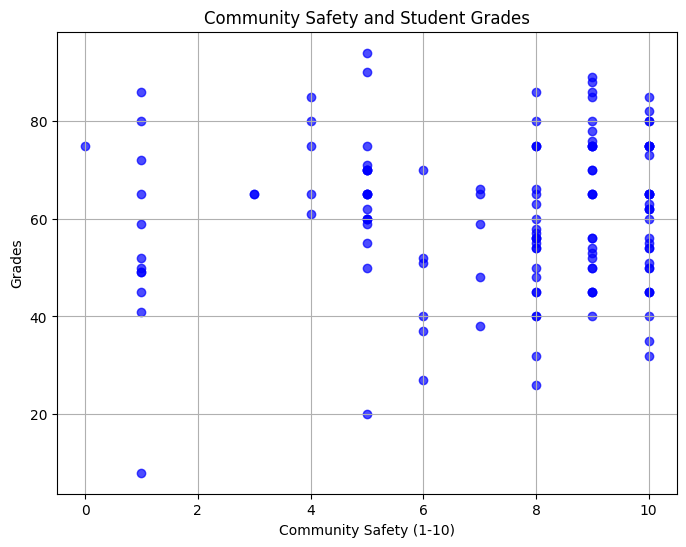

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between community safety and grades
plt.figure(figsize=(8, 6))
plt.scatter(df_safety_grades_cleaned['Safeness_of_community(1-10)'], df_safety_grades_cleaned['Extracted_Grades'], alpha=0.7, color='blue')
plt.title('Community Safety and Student Grades')
plt.xlabel('Community Safety (1-10)')
plt.ylabel('Grades')
plt.grid(True)
plt.show()


In [24]:
# Calculate the Pearson correlation coefficient between community safety and extracted grades
correlation = df_safety_grades_cleaned['Safeness_of_community(1-10)'].corr(df_safety_grades_cleaned['Extracted_Grades'])

correlation


0.045986048337443595

In [19]:
# Extract the column related to child protection
child_protection_col = df['a. Are you involved in activity that supports and demand for child protection? (Quantitative)']

perception_of_community_safety = df['c. Have you ever seen or heard people in your community talking about how to keep children safe? (Qualitative)']

# Display the first few rows of the extracted column
child_protection_col.head()

perception_of_community_safety.head()



0     No
1    Yes
2     No
3     No
4    Yes
Name: c. Have you ever seen or heard people in your community talking about how to keep children safe? (Qualitative), dtype: object

In [25]:
import pandas as pd
import re

# Load the dataset
file_path = 'Data_Cleaned_Community.xlsx'
df = pd.read_excel(file_path)

# Function to extract numeric grades from text
def extract_grade(text):
    text = str(text).lower()
    if 'very good' in text:
        return 75
    elif 'good' in text:
        return 65
    else:
        match = re.search(r'(\d+)', text)
        if match:
            return int(match.group(1))  # Return the first number found
    return None  # Return None if no number is found

# Extract the relevant columns for leadership support and grades
df_leadership_grades = df[[
    "c. Do you think these leaders' support is making a difference in your community? (Qualitative)", 
    'Grades'
]]

# Apply the function to extract grades
df_leadership_grades['Extracted_Grades'] = df_leadership_grades['Grades'].apply(extract_grade)

# Convert the leadership support column to binary (1 for "Yes", 0 for others)
df_leadership_grades['Leadership_Support_Binary'] = df_leadership_grades[
    "c. Do you think these leaders' support is making a difference in your community? (Qualitative)"
].apply(lambda x: 1 if 'yes' in str(x).lower() else 0)

# Drop rows with missing grades
df_leadership_grades_cleaned = df_leadership_grades.dropna(subset=['Extracted_Grades'])

# Calculate mean grades for students with and without leadership support
leadership_grades_stats = df_leadership_grades_cleaned.groupby('Leadership_Support_Binary')['Extracted_Grades'].mean()

# Display the result
print(leadership_grades_stats)


Leadership_Support_Binary
0    59.651163
1    61.663043
Name: Extracted_Grades, dtype: float64


/tmp/ipykernel_61233/3908701548.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leadership_grades['Extracted_Grades'] = df_leadership_grades['Grades'].apply(extract_grade)
/tmp/ipykernel_61233/3908701548.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leadership_grades['Leadership_Support_Binary'] = df_leadership_grades[


In [29]:
# Let's analyze the impact of community safety on well-being and challenges reported by students.

# Extract relevant columns: community safety and challenges
df_safety_challenges = df[['Safeness_of_community(1-10)', 'Challenges']]

# Display the unique challenges to understand the categories
df_safety_challenges['Challenges'].unique()


array(['The workload in the house is too much for me',
       'No light at home and inadequate reading materials',
       'So much work for me in the house', 'Light to read at night',
       'No challenge',
       'There is so much work in the house that is making her to read in the house.',
       'Many work in the house make me not to be able to read',
       'No light to read in the night', 'My challenge is English',
       'My challenge is in Maths',
       'No difficulty because I have lots of books to read',
       "sometimes I don't understand other lessons", 'No challenges',
       "My challenge is in Religious and moral education apart from that I don't think I have any other challenge",
       'My challenge is Mathematics', 'Single parenting', 'Poverty',
       'Lack of text books', 'No reading materials',
       'Inadequate text books and reading books',
       'They is many work in the house',
       'Lack of text books and reading materials',
       'Lack of teachers and t

/tmp/ipykernel_61233/4237869586.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Leadership_Support_Binary'] = df_cluster[
/tmp/ipykernel_61233/4237869586.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Child_Protection_Binary'] = df_cluster[
/tmp/ipykernel_61233/4237869586.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

<Figure size 1400x800 with 0 Axes>

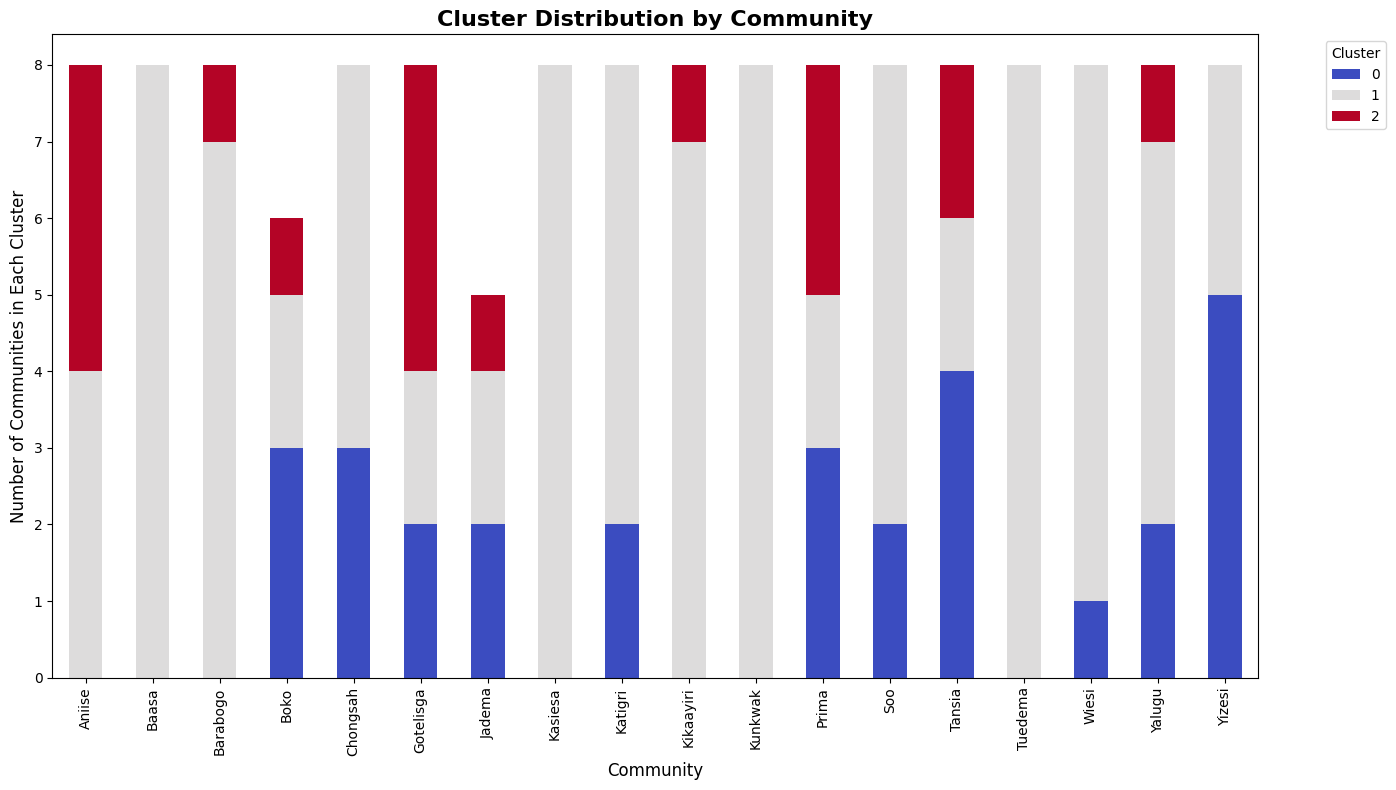

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Data_Cleaned_Community.xlsx'
df = pd.read_excel(file_path)

# Function to categorize challenges
def categorize_challenge(challenge):
    challenge = str(challenge).lower()
    if 'work' in challenge or 'house' in challenge or 'parent' in challenge:
        return 'Household Responsibilities'
    elif 'light' in challenge or 'electricity' in challenge:
        return 'Electricity Issues'
    elif 'textbook' in challenge or 'reading' in challenge or 'materials' in challenge:
        return 'Lack of Learning Materials'
    elif 'math' in challenge or 'english' in challenge or 'lesson' in challenge:
        return 'Academic Difficulties'
    else:
        return 'Other'

# Extract relevant columns for clustering (including community name)
df_cluster = df[[
    '2.Name of Community',  # Assuming this column represents communities
    'Safeness_of_community(1-10)',
    "c. Do you think these leaders' support is making a difference in your community? (Qualitative)",
    'Challenges',
    'a. Are you involved in activity that supports and demand for child protection? (Quantitative)'
]]

# Convert qualitative columns to binary (numeric) values
df_cluster['Leadership_Support_Binary'] = df_cluster[
    "c. Do you think these leaders' support is making a difference in your community? (Qualitative)"
].apply(lambda x: 1 if 'yes' in str(x).lower() else 0)

df_cluster['Child_Protection_Binary'] = df_cluster[
    'a. Are you involved in activity that supports and demand for child protection? (Quantitative)'
].apply(lambda x: 1 if 'yes' in str(x).lower() else 0)

# Categorize challenges
df_cluster['Challenge_Category'] = df_cluster['Challenges'].apply(categorize_challenge)

# Convert challenges into binary indicators for each category
df_cluster = pd.get_dummies(df_cluster, columns=['Challenge_Category'])

# Drop unnecessary columns
df_cluster_cleaned = df_cluster.drop(columns=[
    "c. Do you think these leaders' support is making a difference in your community? (Qualitative)",
    'Challenges',
    'a. Are you involved in activity that supports and demand for child protection? (Quantitative)'
])

# Standardize the data to ensure all features have equal weight
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_cleaned.drop(columns=['2.Name of Community']))

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Group by community and cluster to get counts
df_cluster_by_community = df_cluster.groupby(['2.Name of Community', 'Cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart for cluster distribution by community
plt.figure(figsize=(14, 8))
df_cluster_by_community.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')

plt.title('Cluster Distribution by Community', fontsize=16, fontweight='bold')
plt.xlabel('Community', fontsize=12)
plt.ylabel('Number of Communities in Each Cluster', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


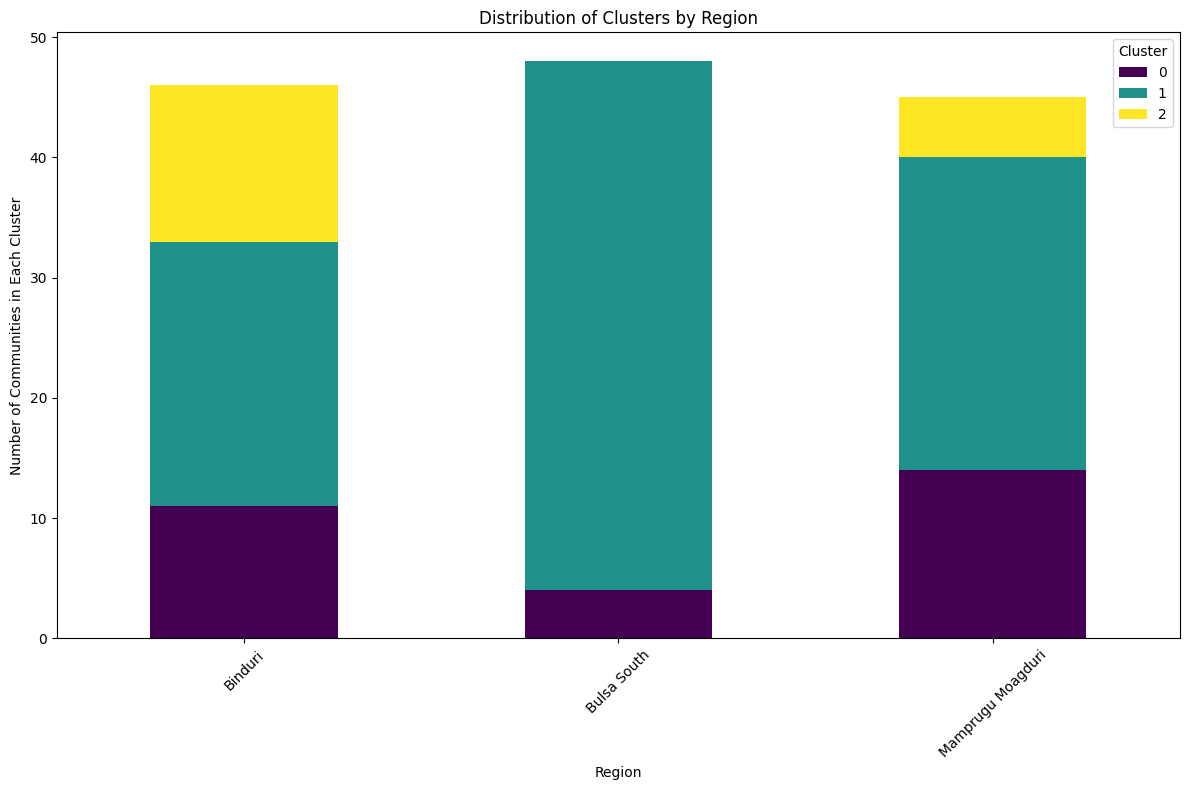

In [37]:
# Group by region and cluster to get counts
df_cluster_by_region = df_cluster.groupby(['1.Name of District', 'Cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
df_cluster_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Distribution of Clusters by Region')
plt.xlabel('Region')
plt.ylabel('Number of Communities in Each Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
